<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Assignment/Dataset1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

In [2]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.  Load Dataset

In [3]:
# Load data
# Colab library to upload files to notebook, Ref:https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "emilyhsucr" # username from the json file
os.environ['KAGGLE_KEY'] = "3b6aa5aa02b468c89e4cfac52a5d992e" # key from the json file
!kaggle competitions download -c porto-seguro-safe-driver-prediction # api copied from kaggle

 83% 25.0M/30.0M [00:00<00:00, 41.8MB/s]
100% 30.0M/30.0M [00:00<00:00, 100MB/s] 
  0% 0.00/2.12M [00:00<?, ?B/s]
100% 2.12M/2.12M [00:00<00:00, 143MB/s]
 65% 29.0M/44.4M [00:00<00:00, 49.3MB/s]
100% 44.4M/44.4M [00:00<00:00, 104MB/s] 


In [0]:
# Titanic
Titanic = pd.read_csv("https://raw.githubusercontent.com/hsuemily/CE888_Hsu-Chi-Rou_1900759/master/Assignment/titanic_train.csv", delimiter = ",")


In [5]:
Titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Data Visualization

Not Survival: 549
Survival: 342
Imbalance rate: 61.62 %


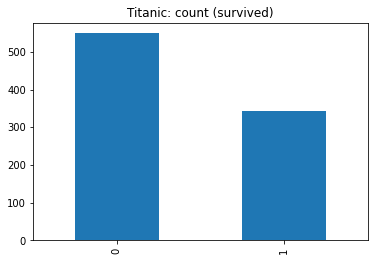

In [7]:
# Plot histogram of the label Survived in Titanic dataset
# Ref: https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python
# Ref: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
pd.Series(Titanic['Survived']).value_counts().plot(kind='bar',title='Titanic: count (survived)')
target_count = Titanic.Survived.value_counts()
print('Not Survival:', target_count[0])
print('Survival:', target_count[1])
print('Imbalance rate:', round((target_count[0] / (target_count[0]+target_count[1]))*100, 2), '%')

## 4. Data Preprocessing
 - 4.1 Missing Value
 - 4.2 Normalization
 - 4.3 Lable encoding or one hot encoding

### 4.1 Missing Value

In [8]:
# dealing with missing value

#*****Titanic
total = Titanic.isnull().sum().sort_values(ascending=False)
# summarize the amount of missing value in each attributes, and then sort it by descending order
# percent = the counts of missing value /the counts of item (in each attribute)
percent = (Titanic.isnull().sum()/Titanic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

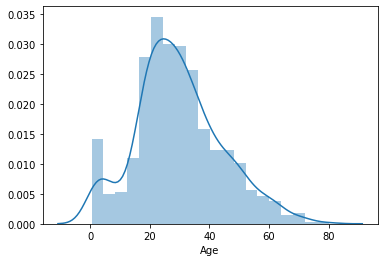

In [9]:
sns.distplot(Titanic['Age'])
Titanic['Age'].describe()

In [0]:
# median
Titanic_copy = Titanic.copy() # copy: copy the original data in order to keep the original data 
Titanic_copy.loc[Titanic_copy['Age'].isnull(),'Age']=Titanic_copy['Age'].mean(skipna=True)

In [0]:
#dealing with missing data
# fill them into none
cols1 = ["Cabin"]
for col in cols1:
    Titanic_copy[col].fillna("None", inplace=True)

In [0]:
# drop the missing value in "Embarked" column
Titanic_copy=Titanic_copy.dropna()

In [13]:
#*****Titanic- check for the missing dataset again
total = Titanic_copy.isnull().sum().sort_values(ascending=False)
percent = (Titanic_copy.isnull().sum()/Titanic_copy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


### 4.2 Normalization

In [14]:
# Normalize dataset - Titanic
for col in Titanic_copy.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    Titanic_copy[col] = mms.fit_transform(Titanic_copy[[col]])
Titanic_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.500000,0.382452,0.655793,0.367347,0.065523,0.063742,0.062649
std,0.288762,0.486260,0.417350,0.162960,0.137963,0.134460,0.097003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250562,0.000000,0.500000,0.271174,0.000000,0.000000,0.015412
50%,0.500000,0.000000,1.000000,0.367921,0.000000,0.000000,0.028213
75%,0.749438,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.3 Lable encoding or one hot encoding

In [15]:
Titanic_X = Titanic_copy.drop('Survived', axis = 1)
Titanic_Y = np.array(Titanic_copy['Survived'])
# Using one hot encoding in Titanic and Adult dataset
# Ref: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
# creating one hot encoder object by default 
# entire data passed is one hot encoded 

# # Onehot Encoder
# # use onehot encoder, the silhouette_score are lower than 0.08
# Encoder = OneHotEncoder()
# Titanic_X = Encoder.fit_transform(Titanic_X).toarray()

# Label Encoder
from sklearn.preprocessing import LabelEncoder
for col in Titanic_X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    Titanic_X[col] = le.fit_transform(Titanic_X[col].astype('str'))
Titanic_X=Titanic_X.values


print("Titanic:",Titanic_X)
print(Titanic_X.shape)
print(Titanic_Y.shape)

Titanic: [[0.00000000e+00 1.00000000e+00 1.08000000e+02 ... 1.41510576e-02
  1.45000000e+02 2.00000000e+00]
 [1.12359551e-03 0.00000000e+00 1.90000000e+02 ... 1.39135735e-01
  8.00000000e+01 0.00000000e+00]
 [2.24719101e-03 1.00000000e+00 3.53000000e+02 ... 1.54685698e-02
  1.45000000e+02 2.00000000e+00]
 ...
 [9.97752809e-01 1.00000000e+00 4.12000000e+02 ... 4.57713517e-02
  1.45000000e+02 2.00000000e+00]
 [9.98876404e-01 0.00000000e+00 8.10000000e+01 ... 5.85561003e-02
  5.90000000e+01 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 2.20000000e+02 ... 1.51269926e-02
  1.45000000e+02 1.00000000e+00]]
(889, 11)
(889,)


## 5. Supervised Learning
### 5.1 Decision tree (cross-validation)
### 5.2 Random forest (cross-validation)

In [0]:
# ## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#

# import numpy as np
# from sklearn.model_selection import StratifiedKFold
# # X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
# # y = np.array([0, 0, 0, 1, 1, 1])
# skf = StratifiedKFold(n_splits=10)
# skf.get_n_splits(Titanic_X, Titanic_Y)


In [0]:
# print(skf)

In [0]:
# for train_index, test_index in skf.split(Titanic_X, Titanic_Y):
#   print("TRAIN:", train_index, "TEST:", test_index)
#   X_train, X_test = Titanic_X[train_index], Titanic_X[test_index]
#   y_train, y_test = Titanic_Y[train_index], Titanic_Y[test_index]

In [18]:
## Decision tree 

### Ref_1: https://www.kaggle.com/sudhirnl7/logistic-regression-with-stratifiedkfold
### Ref_2: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#
#Import library
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
cv_scoreDT =[]
i=1
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]
    
    #model
    modelDT = tree.DecisionTreeClassifier(criterion = "entropy",random_state=1)
    # model = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=15, max_features=14, criterion = "entropy",random_state=1)
    modelDT.fit(x_tr,y_tr)
    scoreDT = roc_auc_score(y_v,modelDT.predict(x_v))
    print('ROC AUC score:',scoreDT)
    cv_scoreDT.append(scoreDT)
    print('Confusion matrix\n',confusion_matrix(y_v,modelDT.predict(x_v))) 
    i+=1 

1 of KFold 10
ROC AUC score: 0.7326203208556149
Confusion matrix
 [[45 10]
 [12 22]]
2 of KFold 10
ROC AUC score: 0.8131016042780749
Confusion matrix
 [[49  6]
 [ 9 25]]
3 of KFold 10
ROC AUC score: 0.827807486631016
Confusion matrix
 [[49  6]
 [ 8 26]]
4 of KFold 10
ROC AUC score: 0.8061497326203207
Confusion matrix
 [[45 10]
 [ 7 27]]
5 of KFold 10
ROC AUC score: 0.7291443850267381
Confusion matrix
 [[43 12]
 [11 23]]
6 of KFold 10
ROC AUC score: 0.8005347593582888
Confusion matrix
 [[46  9]
 [ 8 26]]
7 of KFold 10
ROC AUC score: 0.6828877005347593
Confusion matrix
 [[46  9]
 [16 18]]
8 of KFold 10
ROC AUC score: 0.7200534759358289
Confusion matrix
 [[42 13]
 [11 23]]
9 of KFold 10
ROC AUC score: 0.6780748663101605
Confusion matrix
 [[39 16]
 [12 22]]
10 of KFold 10
ROC AUC score: 0.6900871459694989
Confusion matrix
 [[38 16]
 [11 23]]


In [19]:
print('Cv',cv_scoreDT,'\nMean cv Score',np.mean(cv_scoreDT))

Cv [0.7326203208556149, 0.8131016042780749, 0.827807486631016, 0.8061497326203207, 0.7291443850267381, 0.8005347593582888, 0.6828877005347593, 0.7200534759358289, 0.6780748663101605, 0.6900871459694989] 
Mean cv Score 0.74804614775203


In [20]:
## Random forest
from sklearn.ensemble import RandomForestClassifier
cv_scoreRF =[]
i=1
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]
    
    #model
    modelRF = RandomForestClassifier(random_state=1)
    modelRF.fit(x_tr,y_tr)
    scoreRF = roc_auc_score(y_v,modelRF.predict(x_v))
    print('ROC AUC score:',scoreRF)
    cv_scoreRF.append(scoreRF)
    print('Confusion matrix\n',confusion_matrix(y_v,modelRF.predict(x_v)))
    i+=1

1 of KFold 10
ROC AUC score: 0.7465240641711229
Confusion matrix
 [[53  2]
 [16 18]]
2 of KFold 10
ROC AUC score: 0.8550802139037433
Confusion matrix
 [[52  3]
 [ 8 26]]
3 of KFold 10
ROC AUC score: 0.8788770053475935
Confusion matrix
 [[53  2]
 [ 7 27]]
4 of KFold 10
ROC AUC score: 0.8425133689839571
Confusion matrix
 [[49  6]
 [ 7 27]]
5 of KFold 10
ROC AUC score: 0.7157754010695188
Confusion matrix
 [[48  7]
 [15 19]]
6 of KFold 10
ROC AUC score: 0.822192513368984
Confusion matrix
 [[50  5]
 [ 9 25]]
7 of KFold 10
ROC AUC score: 0.8109625668449197
Confusion matrix
 [[52  3]
 [11 23]]
8 of KFold 10
ROC AUC score: 0.8516042780748663
Confusion matrix
 [[50  5]
 [ 7 27]]
9 of KFold 10
ROC AUC score: 0.7802139037433156
Confusion matrix
 [[47  8]
 [10 24]]
10 of KFold 10
ROC AUC score: 0.7990196078431373
Confusion matrix
 [[45  9]
 [ 8 26]]


In [21]:
print('Cv',cv_scoreRF,'\nMean cv Score',np.mean(cv_scoreRF))

Cv [0.7465240641711229, 0.8550802139037433, 0.8788770053475935, 0.8425133689839571, 0.7157754010695188, 0.822192513368984, 0.8109625668449197, 0.8516042780748663, 0.7802139037433156, 0.7990196078431373] 
Mean cv Score 0.8102762923351159


In [0]:
## Do the grid search in decision tree and random forest ##

## 6. Unsupervised Learning
6.1  Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.

6.2 K-mean method and save the information

### 6.1 Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.

In [0]:
# ## Elbow method (K-mean method) (stratified cross-validation)
# ### Ref: https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# score = []
# for cluster in range(1,10):
#     kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
#     kmeans.fit(x_tr)
#     score.append(kmeans.inertia_)

# # plotting the score

# plt.plot(range(1,10), score)
# plt.title('The Elbow Method')
# plt.xlabel('no of clusters')
# plt.ylabel('wcss')
# plt.show()

1 of KFold 10


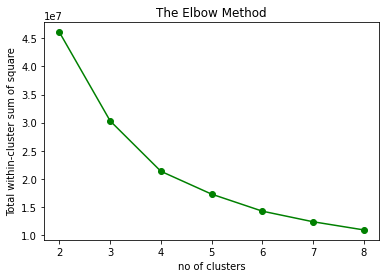

2 of KFold 10


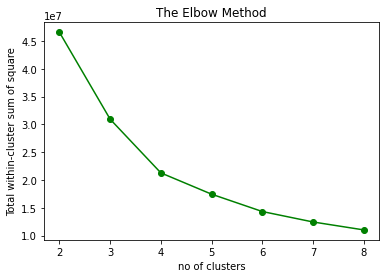

3 of KFold 10


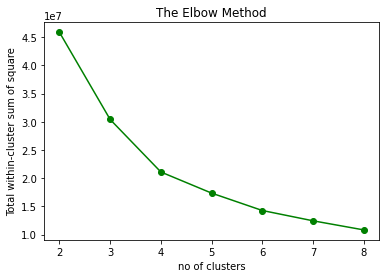

4 of KFold 10


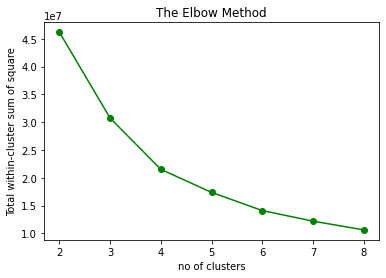

5 of KFold 10


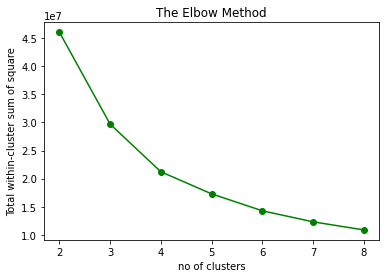

6 of KFold 10


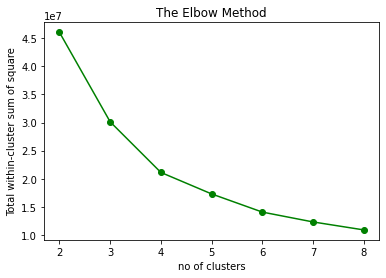

7 of KFold 10


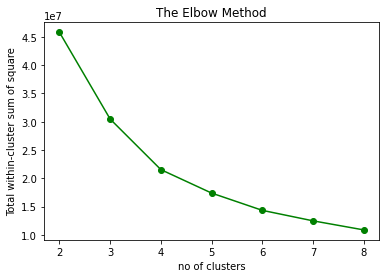

8 of KFold 10


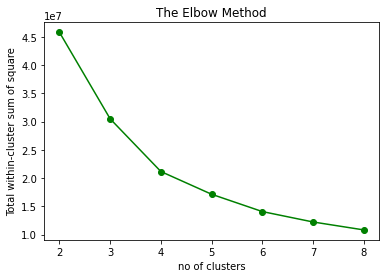

9 of KFold 10


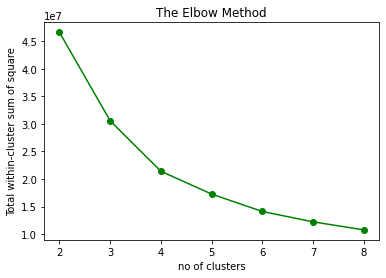

10 of KFold 10


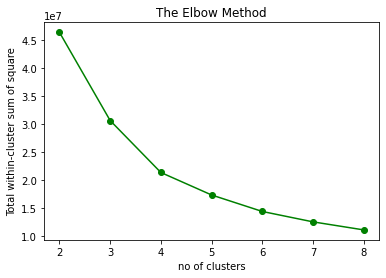

In [24]:
## Elbow method (K-mean method) (stratified cross-validation)
### Ref: https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
cv_scoreDT =[]
i=1
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]

    score = []
    for cluster in range(2,9):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
        kmeans.fit(x_tr)
        score.append(kmeans.inertia_)

    # plotting the score

    plt.plot(range(2,9), score, 'g-o')
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('Total within-cluster sum of square')
    plt.show()
    i+=1
    ## Total within-cluster sum of square: https://www.jamleecute.com/partitional-clustering-kmeans-kmedoid/


For n_clusters = 2 The average silhouette_score is : 0.4052993666024812
For n_clusters = 3 The average silhouette_score is : 0.41155782942033153
For n_clusters = 4 The average silhouette_score is : 0.40152767333503947
For n_clusters = 5 The average silhouette_score is : 0.3890021704845829
For n_clusters = 6 The average silhouette_score is : 0.37443046154031223
For n_clusters = 7 The average silhouette_score is : 0.37213686476214
For n_clusters = 8 The average silhouette_score is : 0.3585669852011648


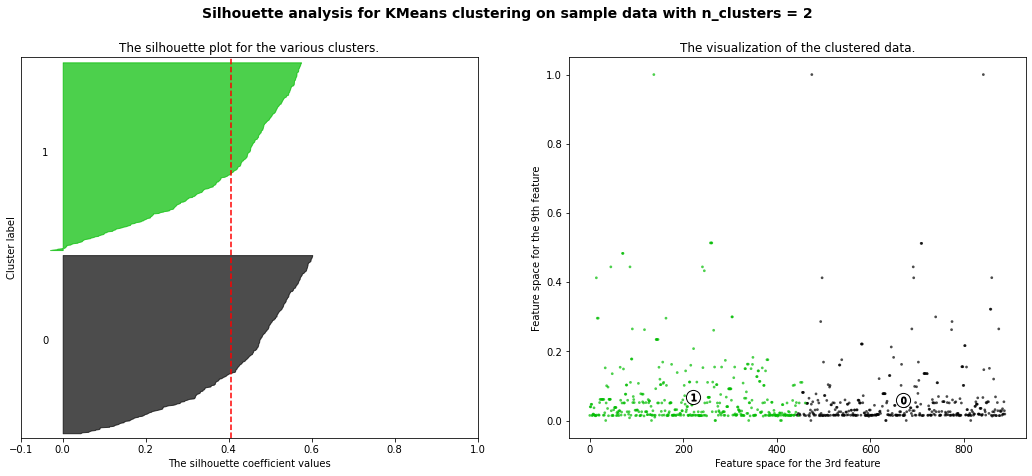

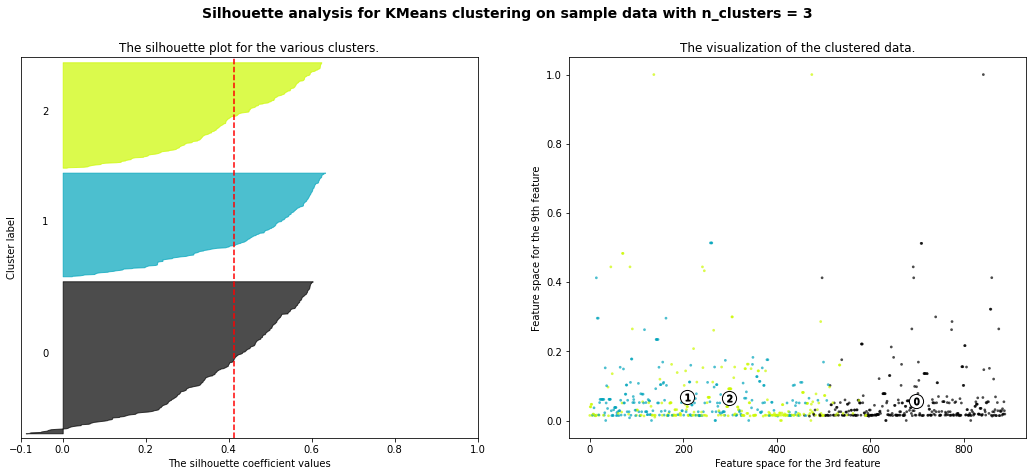

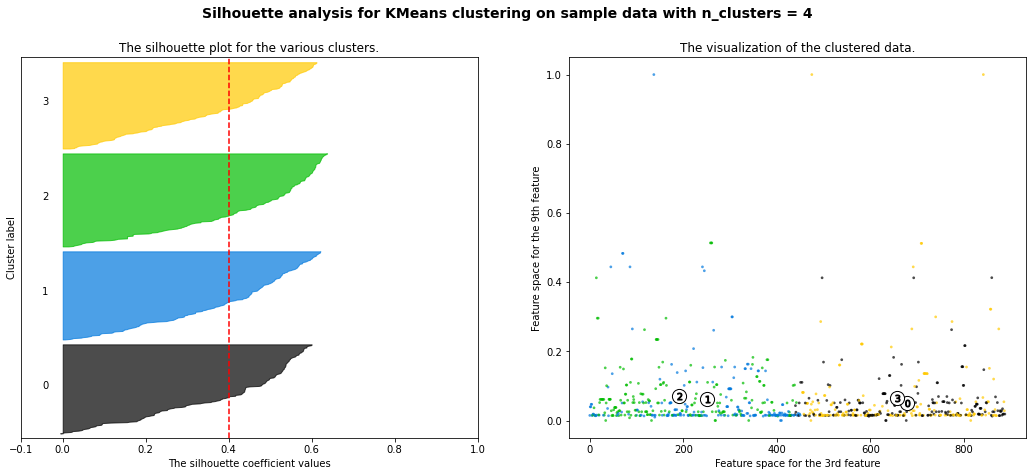

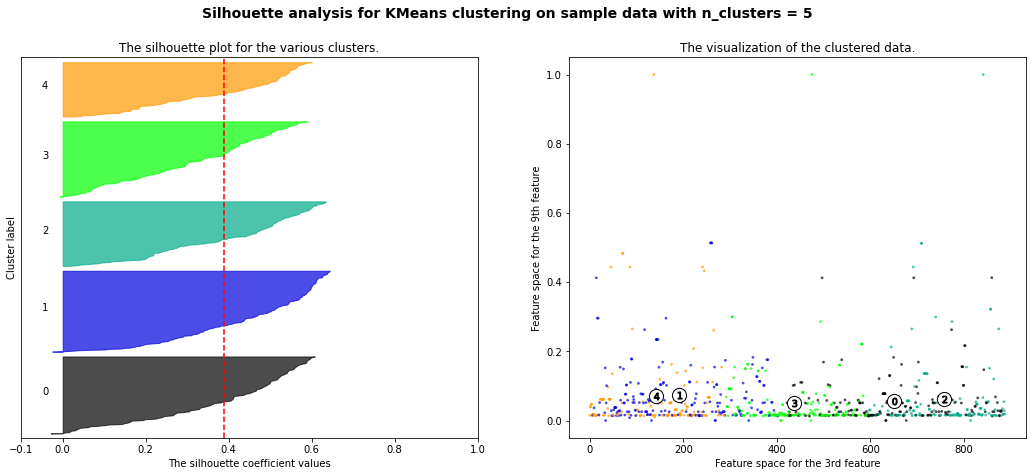

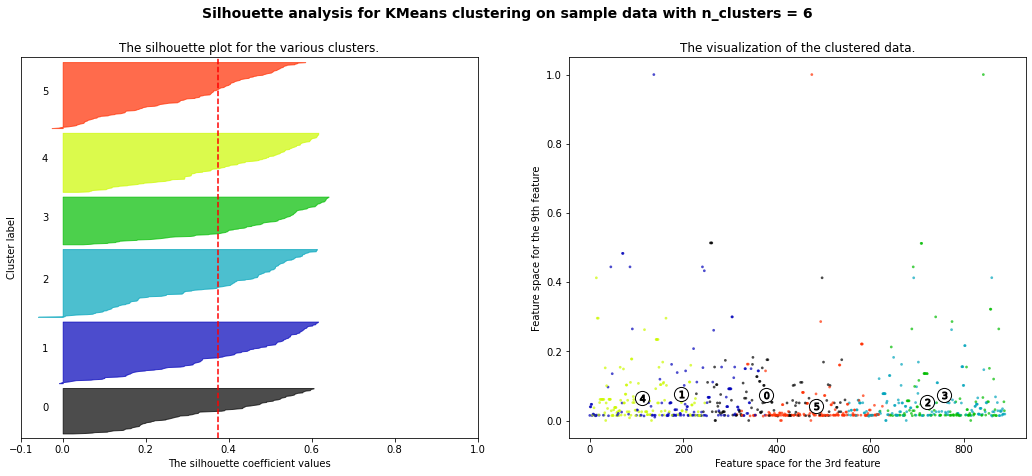

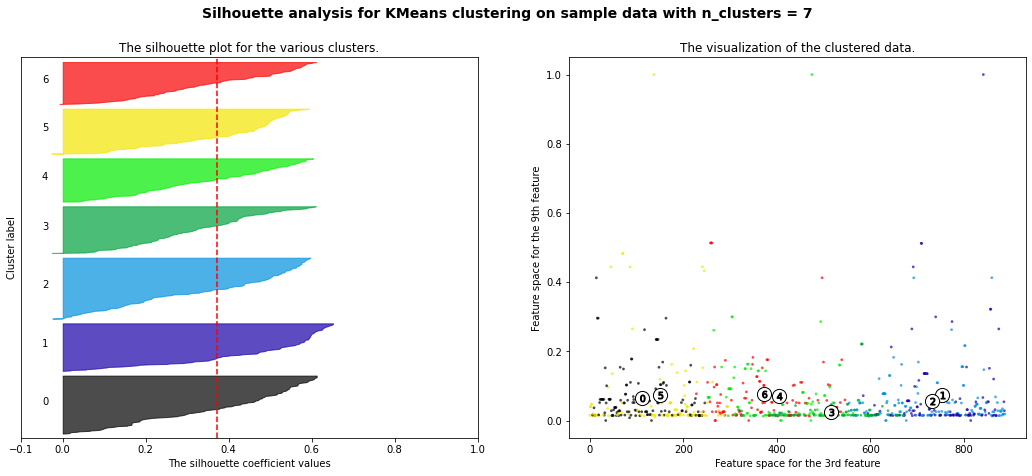

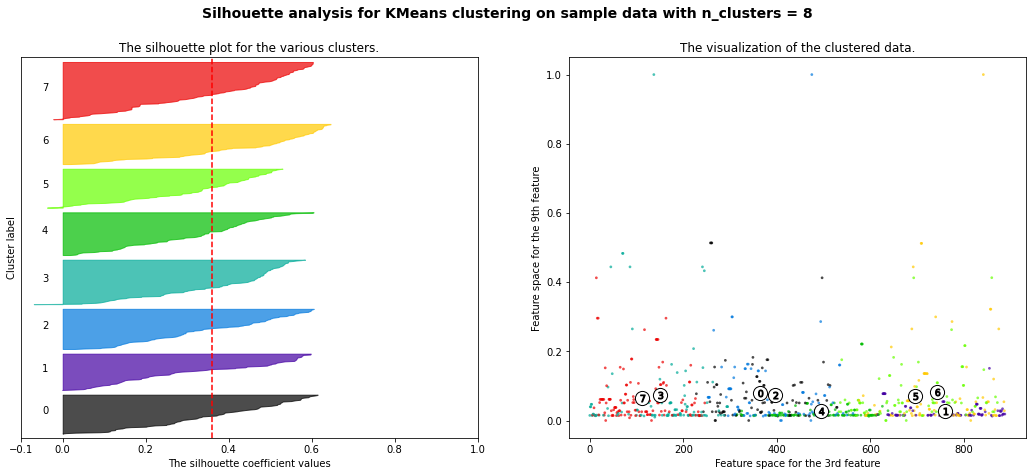

In [25]:
## Silhouette score
### Ref_1: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
### Ref_2: https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette

import matplotlib.cm as cm

silhouette_avg_list = []
n_clusters_list = []
for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_tr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=49)
    cluster_labels = clusterer.fit_predict(x_tr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_tr, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_list += [silhouette_avg]
    n_clusters_list += [n_clusters]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_tr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_tr[:, 2], x_tr[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 2], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 3rd feature")
    ax2.set_ylabel("Feature space for the 9th feature")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

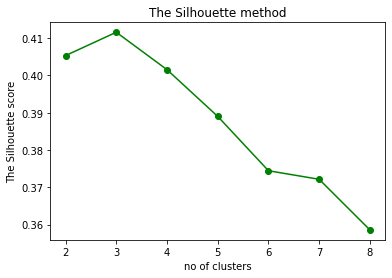

In [26]:
plt.plot(n_clusters_list, silhouette_avg_list, 'g-o')
plt.title('The Silhouette method')
plt.xlabel('no of clusters')
plt.ylabel('The Silhouette score')
plt.show()

### 6.2 K-mean method and save the information

In [27]:
## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=49).fit(x_tr)
kmLabels = kmeans.labels_
Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
centroids = kmeans.cluster_centers_
print('Label:', Label)
print('Centroids',centroids)

Label: [390, 411]
Centroids [[4.84016134e-01 6.88461538e-01 6.69902564e+02 6.56410256e-01
  3.74937303e-01 5.73717949e-02 5.64102564e-02 3.51902564e+02
  5.80316168e-02 1.31905128e+02 1.50512821e+00]
 [5.21673638e-01 6.26520681e-01 2.21598540e+02 6.66666667e-01
  3.65222008e-01 6.32603406e-02 6.85320357e-02 3.23798054e+02
  6.66776908e-02 1.26323601e+02 1.56690998e+00]]


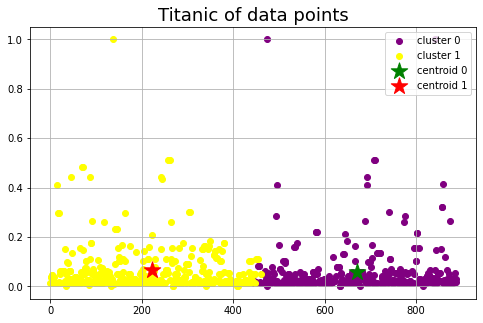

In [28]:
## Ref: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
plt.figure(figsize=(8,5))
plt.title("Titanic of data points", fontsize=18)
plt.grid(True)
plt.scatter(x_tr[kmeans.labels_ == 0, 2], x_tr[kmeans.labels_ == 0, 8],
            c='purple', label='cluster 0')
plt.scatter(x_tr[kmeans.labels_ == 1, 2], x_tr[kmeans.labels_ == 1, 8],
            c='yellow', label='cluster 1')
plt.scatter(centroids[0, 2], centroids[0, 8], marker='*', s=300, c='g', label='centroid 0')
plt.scatter(centroids[1, 2], centroids[1, 8], marker='*', s=300, c='r', label='centroid 1')
plt.legend()
plt.savefig('Titanic_Kmean_10th fold.png', dpi=300)
plt.show()


In [30]:
centers

array([[5.40388373e-01, 4.07608696e-01, 3.64054348e+02, 6.30434783e-01,
        3.99695307e-01, 5.29891304e-02, 5.07246377e-02, 1.15489130e+02,
        7.89150443e-02, 1.14847826e+02, 1.47826087e+00],
       [4.88555004e-01, 9.36046512e-01, 7.60616279e+02, 7.44186047e-01,
        3.38136150e-01, 6.83139535e-02, 6.00775194e-02, 3.03627907e+02,
        2.74119421e-02, 1.44000000e+02, 1.74418605e+00],
       [5.03394441e-01, 6.52631579e-01, 3.97042105e+02, 6.52631579e-01,
        3.67916430e-01, 7.76315789e-02, 8.07017544e-02, 5.88147368e+02,
        7.26779681e-02, 1.31978947e+02, 1.53684211e+00],
       [5.09010166e-01, 7.14285714e-01, 1.50980952e+02, 7.14285714e-01,
        3.72131421e-01, 3.69047619e-02, 4.44444444e-02, 5.15638095e+02,
        7.26419338e-02, 1.30085714e+02, 1.51428571e+00],
       [5.17832907e-01, 9.55445545e-01, 4.95564356e+02, 6.83168317e-01,
        3.52860745e-01, 4.20792079e-02, 3.13531353e-02, 3.76960396e+02,
        2.65923736e-02, 1.43089109e+02, 1.60396040e+

1 of KFold 10


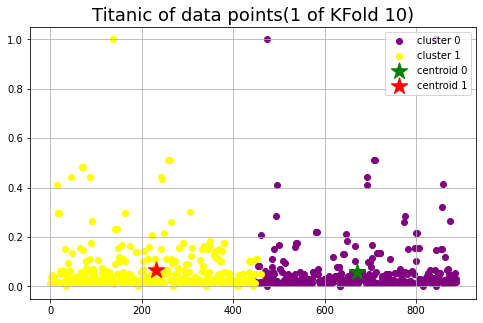

2 of KFold 10


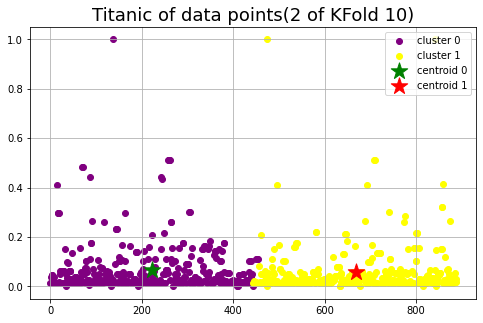

3 of KFold 10


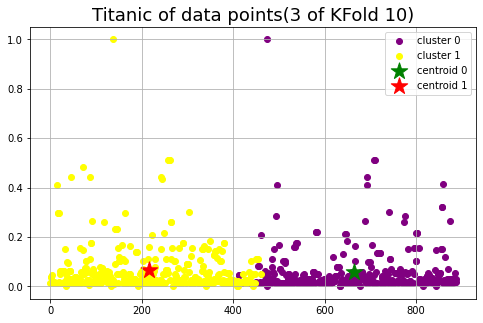

4 of KFold 10


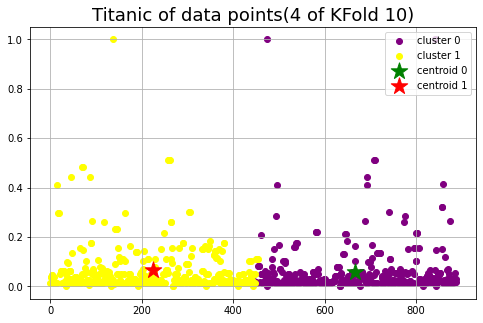

5 of KFold 10


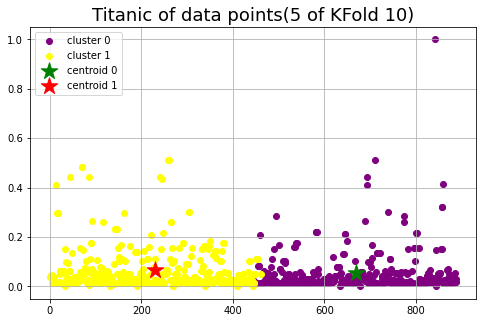

6 of KFold 10


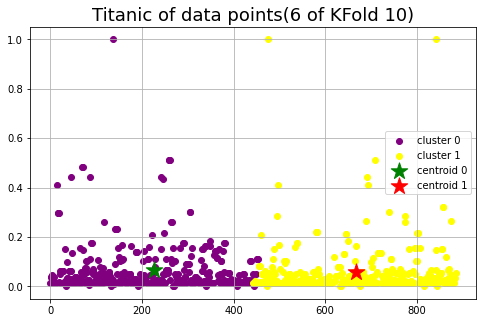

7 of KFold 10


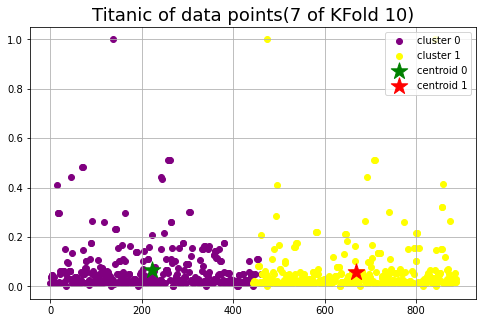

8 of KFold 10


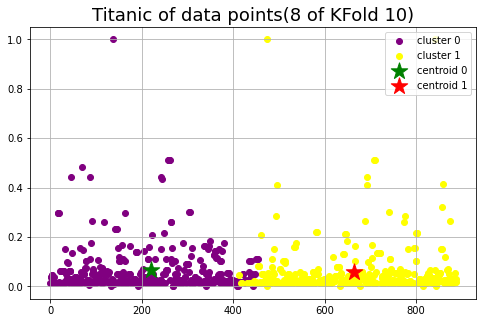

9 of KFold 10


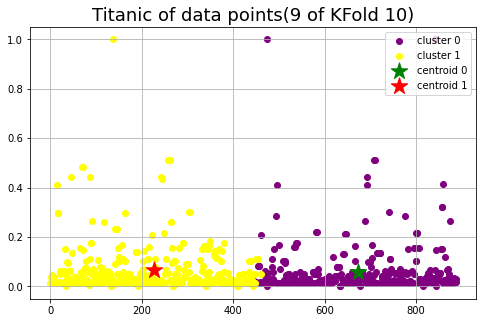

10 of KFold 10


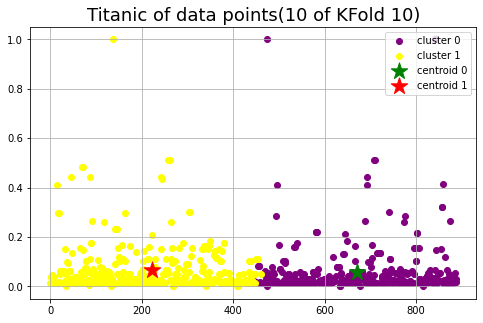

In [34]:
## Partition each of the datasets into 10 bins
## , keeping the imbalance ratio from the original dataset 
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
Label_all = []
centroids_all = []
i=1

## Use different 9 bins in training dataset,
## and remain one to be the testing dataset
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=49).fit(x_tr)
    kmLabels = kmeans.labels_
    ## save the centroid and the number of samples in each cluster in each 9 bins
    Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
    Label_all += [Label]
    centroids = kmeans.cluster_centers_
    centroids_all += [centroids]

    ## plot the distribution of samples and the centroids
    plt.figure(figsize=(8,5))
    plt.title("Titanic of data points" "(%d of KFold 10)" %i, fontsize=18)
    plt.grid(True)
    plt.scatter(x_tr[kmeans.labels_ == 0, 2], x_tr[kmeans.labels_ == 0, 8],
                c='purple', label='cluster 0')
    plt.scatter(x_tr[kmeans.labels_ == 1, 2], x_tr[kmeans.labels_ == 1, 8],
                c='yellow', label='cluster 1')
    plt.scatter(centroids[0, 2], centroids[0, 8], marker='*', s=300, c='g', label='centroid 0')
    plt.scatter(centroids[1, 2], centroids[1, 8], marker='*', s=300, c='r', label='centroid 1')
    plt.legend()
    plt.savefig('Titanic_Kmean_' + str(i) + 'of K fold 10.png', dpi=300)
    plt.show()
    i+=1
